In [1]:
### Packages ####

import os, math
import numpy as np
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install folium

sns.set_style("darkgrid")
import requests
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from urllib.request import urlopen
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import warnings
from datetime import datetime ,timedelta
import json
import re

In [2]:
warnings.filterwarnings('ignore')

In [3]:
### Tsunami Dataset 1800 - Present ###
df = pd.read_csv("C:\\Users\\orin_\\Desktop\Python project\\tsunami_V4.csv")
df


,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,...,Region,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Magnitude (Abe),Tsunami Magnitude (Iida),Tsunami Intensity,Warn Status
0,"[""Year >= 1800""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1800.0,6.0,2.0,20.0,17.0,NaN,2.0,1.0,NaN,...,73.0,AZORES,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,NaN,1802.0,1.0,4.0,7.0,NaN,NaN,2.0,1.0,NaN,...,50.0,BAKAR,45.300,14.400,NaN,3.0,NaN,NaN,3.0,NaN
3,NaN,1802.0,3.0,19.0,NaN,NaN,NaN,2.0,1.0,NaN,...,74.0,ANTIGUA ISLAND & ST. CHRISTOPHER,17.200,-62.400,NaN,2.0,NaN,NaN,NaN,NaN
4,NaN,1802.0,8.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,...,73.0,SW ENGLAND,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,NaN,2021.0,3.0,4.0,13.0,27.0,36.0,4.0,1.0,7.3,...,81.0,GISBORNE,-37.563,179.444,0.28,9.0,NaN,NaN,NaN,NaN
2130,NaN,2021.0,3.0,4.0,17.0,41.0,25.0,4.0,1.0,7.4,...,81.0,"S OF RAOUL ISLAND, KERMADEC ISLANDS",-29.613,-177.843,0.31,8.0,NaN,NaN,NaN,NaN
2131,NaN,2021.0,3.0,4.0,19.0,28.0,31.0,4.0,1.0,8.1,...,81.0,"S OF RAOUL ISLAND, KERMADEC ISLANDS",-29.740,-177.267,1.00,81.0,NaN,NaN,NaN,NaN
2132,NaN,2021.0,3.0,18.0,0.0,4.0,6.0,4.0,1.0,6.0,...,50.0,N. ALGERIA,36.915,5.199,0.06,4.0,NaN,NaN,NaN,NaN


In [4]:
### Tsunami Dataset Historical ###
df2 = pd.read_csv("C:\\Users\\orin_\\Desktop\Python project\\tsunami_V6.csv")
df2

,DATE_STRIN,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,CAUSE_CODE
0,12/26/2004,5.283000,95.247000,"ACEH, SUMATRA",ACEH,INDONESIA,60,0
1,12/26/2004,5.355000,95.242000,"ACEH, SUMATRA",ACEH,INDONESIA,60,0
2,12/26/2004,5.436000,95.235000,"ACEH, SUMATRA",ACEH,INDONESIA,60,0
3,1861/02/16,0.550000,97.750000,"FORT LAUDI, NIAS I., SUMATRA",NORTH SUMATRA,INDONESIA,60,0
4,1861/02/16,4.150000,96.100000,"ANALABOO, SUMATRA, INDONESIA",ACEH,INDONESIA,60,0
...,...,...,...,...,...,...,...,...
26819,8/31/2012,19.283000,166.617000,WAKE ISLAND,UM,USA TERRITORY,80,0
26820,1788/07/21,57.130000,-153.480000,"THREE SAINTS BAY, KODIAK, AK",AK,USA,87,0
26821,1/5/2013,56.247000,-134.647000,"PORT ALEXANDER, AK",AK,USA,87,0
26822,1/5/2013,57.052000,-135.342000,"SITKA, AK",AK,USA,87,0


In [5]:
merge_df=pd.concat([df,df2],ignore_index=True)
merge_df

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,...,Tsunami Intensity,Warn Status,DATE_STRIN,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,CAUSE_CODE
0,"[""Year >= 1800""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1800.0,6.0,2.0,20.0,17.0,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1802.0,1.0,4.0,7.0,NaN,NaN,2.0,1.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1802.0,3.0,19.0,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1802.0,8.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8/31/2012,19.283000,166.617000,WAKE ISLAND,UM,USA TERRITORY,80.0,0.0
28954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1788/07/21,57.130000,-153.480000,"THREE SAINTS BAY, KODIAK, AK",AK,USA,87.0,0.0
28955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1/5/2013,56.247000,-134.647000,"PORT ALEXANDER, AK",AK,USA,87.0,0.0
28956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1/5/2013,57.052000,-135.342000,"SITKA, AK",AK,USA,87.0,0.0


In [6]:
###########################
###### Data Cleaning ######
###########################

In [7]:
del merge_df['Warn Status']
del merge_df['Tsunami Intensity']
del merge_df['Tsunami Magnitude (Iida)']
del merge_df['Tsunami Magnitude (Abe)']
del merge_df['Number of Runups']
del merge_df['Maximum Water Height (m)']
del merge_df['Search Parameters']

In [8]:
###############################
########New Data frame#########
###############################

merge_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Focal Depth (km),...,Latitude,Longitude,DATE_STRIN,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,CAUSE_CODE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1800.0,6.0,2.0,20.0,17.0,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1802.0,1.0,4.0,7.0,NaN,NaN,2.0,1.0,NaN,NaN,...,45.3,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1802.0,3.0,19.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,...,17.2,-62.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1802.0,8.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8/31/2012,19.283000,166.617000,WAKE ISLAND,UM,USA TERRITORY,80.0,0.0
28954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1788/07/21,57.130000,-153.480000,"THREE SAINTS BAY, KODIAK, AK",AK,USA,87.0,0.0
28955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1/5/2013,56.247000,-134.647000,"PORT ALEXANDER, AK",AK,USA,87.0,0.0
28956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1/5/2013,57.052000,-135.342000,"SITKA, AK",AK,USA,87.0,0.0


In [9]:
##########################################
######### Drop all the Nan indexes #######
##########################################
merge_df = merge_df.dropna(subset=['Latitude','Longitude','Tsunami Cause Code'])
merge_df = merge_df.sort_values(by=['Tsunami Cause Code'], ascending = False).reset_index(drop=True)
merge_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Focal Depth (km),...,Latitude,Longitude,DATE_STRIN,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,CAUSE_CODE
0,1917.0,12.0,6.0,13.0,4.0,NaN,4.0,10.0,NaN,NaN,...,44.633,-63.583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934.0,8.0,21.0,NaN,NaN,NaN,0.0,9.0,NaN,NaN,...,33.700,-118.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.0,3.0,19.0,4.0,30.0,NaN,4.0,9.0,NaN,NaN,...,27.835,51.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991.0,5.0,7.0,NaN,NaN,NaN,1.0,9.0,NaN,NaN,...,37.133,26.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1933.0,3.0,11.0,1.0,54.0,7.8,1.0,9.0,6.3,16.0,...,33.616,-117.966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1917.0,3.0,16.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,...,-3.700,116.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1859,1917.0,8.0,23.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,...,-3.600,128.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,1862.0,4.0,8.0,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,...,-6.700,108.570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,1894.0,11.0,21.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,...,49.000,-34.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df2 = df2.dropna(subset=['LATITUDE','LONGITUDE','CAUSE_CODE'])
df2

In [10]:
merge_df = merge_df.sort_values(by=['Tsunami Cause Code'], ascending = False).reset_index(drop=True)
merge_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Focal Depth (km),...,Latitude,Longitude,DATE_STRIN,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,CAUSE_CODE
0,1917.0,12.0,6.0,13.0,4.0,NaN,4.0,10.0,NaN,NaN,...,44.633,-63.583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1915.0,2.0,11.0,NaN,NaN,NaN,1.0,9.0,NaN,NaN,...,-14.180,-169.660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1934.0,8.0,21.0,NaN,NaN,NaN,0.0,9.0,NaN,NaN,...,33.700,-118.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1899.0,12.0,25.0,12.0,25.0,NaN,1.0,9.0,6.4,NaN,...,33.800,-118.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1856.0,9.0,NaN,NaN,NaN,NaN,2.0,9.0,NaN,NaN,...,35.600,139.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1872.0,6.0,13.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,...,43.500,-78.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1859,1874.0,10.0,13.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,...,-43.328,145.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,1906.0,8.0,7.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,...,33.900,-117.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,1840.0,8.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,...,-37.610,178.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#merge_df['Longitude'] = merge_df['Longitude'].replace({'−': '-'},regex=True)
#merge_df['Latitude'] = merge_df['Latitude'].replace({'−': '-'},regex=True)
#merge_df['Latitude'] = merge_df['Latitude'].replace({':': '.'},regex=True)
#merge_df['Tsunami Cause Code'] = merge_df['Tsunami Cause Code'].replace({'\.': ':'},regex=True)
#merge_df

In [12]:
### remove outliners

merge_df['Longitude'] = merge_df['Longitude'].astype('float')
merge_df = merge_df[merge_df['Longitude']<=181].reset_index(drop=True)
merge_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Focal Depth (km),...,Latitude,Longitude,DATE_STRIN,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,CAUSE_CODE
0,1917.0,12.0,6.0,13.0,4.0,NaN,4.0,10.0,NaN,NaN,...,44.633,-63.583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1915.0,2.0,11.0,NaN,NaN,NaN,1.0,9.0,NaN,NaN,...,-14.180,-169.660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1934.0,8.0,21.0,NaN,NaN,NaN,0.0,9.0,NaN,NaN,...,33.700,-118.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1899.0,12.0,25.0,12.0,25.0,NaN,1.0,9.0,6.4,NaN,...,33.800,-118.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1856.0,9.0,NaN,NaN,NaN,NaN,2.0,9.0,NaN,NaN,...,35.600,139.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1872.0,6.0,13.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,...,43.500,-78.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1859,1874.0,10.0,13.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,...,-43.328,145.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,1906.0,8.0,7.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,...,33.900,-117.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,1840.0,8.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,...,-37.610,178.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
################################
######## Wikipedia Crawling#####
#######Table 1900-1950##########
################################

response = requests.get(
    url="https://en.wikipedia.org/wiki/List_of_tsunamis",
)
print(response.status_code)
url="https://en.wikipedia.org/wiki/List_of_tsunamis"
html = requests.get(url)

soup=BeautifulSoup(html.content,"html.parser")
tbl=soup("table",attrs={"class":"wikitable"})[5]

200


In [14]:
date=list()
location=list()
primary_cause=list()

for row in tbl("tr"):
    cells=row("td")
    if(len(cells)<5):
        continue
    date.append(cells[0].get_text())
    location.append(cells[1].get_text())
    primary_cause.append(cells[3].get_text())
df=pd.DataFrame({"date":date,"location":location,"Primary Cause":primary_cause})
df

,date,location,Primary Cause
0,1905,"Loenvatnet, Norway",Rockfall
1,1905,"Disenchantment Bay, Alaska",Glacier collapse
2,1906,"Tumaco-Esmeraldas, Colombia-Ecuador",Earthquake
3,1907,"Simeulue, Nias off Sumatra",Earthquake
4,1908,"Messina, Italy",Underwater landslide triggered by an earthquake
5,1918,Puerto Rico,Earthquake/submarine landslide
6,1923,"Kantō, Japan",Earthquake
7,1929,Newfoundland,Earthquake
8,1930\n,"Gulf of Martaban, Burma (Myanmar)\n",Earthquake\n
9,1932,Mexico,Earthquake


In [15]:
################################
######## Wikipedia Crawling#####
#######Table 1950-2000##########
################################

response = requests.get(
    url="https://en.wikipedia.org/wiki/List_of_tsunamis",
)
print(response.status_code)
url="https://en.wikipedia.org/wiki/List_of_tsunamis"
html = requests.get(url)

soup=BeautifulSoup(html.content,"html.parser")
tbl=soup("table",attrs={"class":"wikitable"})[6]

200


In [16]:
date=list()
location=list()
primary_cause=list()

for row in tbl("tr"):
    cells=row("td")
    if(len(cells)<5):
        continue
    date.append(cells[0].get_text())
    location.append(cells[1].get_text())
    primary_cause.append(cells[3].get_text())
df=pd.DataFrame({"date":date,"location":location,"Primary Cause":primary_cause})
df

,date,location,Primary Cause
0,1952,"Severo-Kurilsk, Kuril Islands, USSR",Earthquake
1,1956,"Amorgos, Greece",Earthquake
2,1958,"Lituya Bay, Alaska, U.S.",Earthquake-triggered landslide
3,1960,"Valdivia, Chile, and Pacific Ocean",Earthquake
4,1963,"Vajont Dam, Monte Toc, Italy",Landslide
5,1964,"Niigata, Japan",Earthquake
6,1964,"Alaska, U.S. and Pacific Ocean",Earthquake
7,1965,"Shemya Island, Alaska",Earthquake
8,1969,"Portugal, Morocco",Earthquake
9,1976,"Moro Gulf, Mindanao, Philippines",Earthquake


In [17]:
################################
######## Wikipedia Crawling#####
#######Table 2000-Present#######
################################

response = requests.get(
    url="https://en.wikipedia.org/wiki/List_of_tsunamis",
)
print(response.status_code)
url="https://en.wikipedia.org/wiki/List_of_tsunamis"
html = requests.get(url)

soup=BeautifulSoup(html.content,"html.parser")
tbl=soup("table",attrs={"class":"wikitable"})[7]


200


In [18]:
date=list()
location=list()
primary_cause=list()

for row in tbl("tr"):
    cells=row("td")
    if(len(cells)<5):
        continue
    date.append(cells[0].get_text())
    location.append(cells[1].get_text())
    primary_cause.append(cells[3].get_text())
df=pd.DataFrame({"date":date,"location":location,"Primary Cause":primary_cause})
df

,date,location,Primary Cause
0,2004,Indian Ocean,Earthquake
1,2006,South of Java Island,Earthquake
2,2006,Kuril Islands,Earthquake
3,2007,Solomon Islands,Earthquake
4,2007,Chile,Earthquake and landslide
5,2007,British Columbia,Landslide
6,2009,Samoa,Earthquake
7,2010,Chile,Earthquake
8,2010,Sumatra,Earthquake
9,2011,New Zealand,Earthquake-triggered ice fall


In [19]:
baseUrl="https://data.world/dhs/tsunami-tide-guages/workspace/file?filename=Tsunami_Tide_Guages.csv"


In [20]:
map_ = folium.Map(location=[0.78, 113.92], tiles='openstreetmap', zoom_start=4.8)

for idx, row in merge_df.iterrows():
    Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='blue', icon='tint', prefix='fa')).add_to(map_)

map_


In [21]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.6)

mc = MarkerCluster()
for idx, row in merge_df.iterrows():
    mc.add_child(Marker([row['Latitude'], row['Longitude']]))

map_.add_child(mc)
map_

In [22]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.5)

HeatMap(data=merge_df[['Latitude', 'Longitude']], radius=10).add_to(map_)

# Display the map
map_

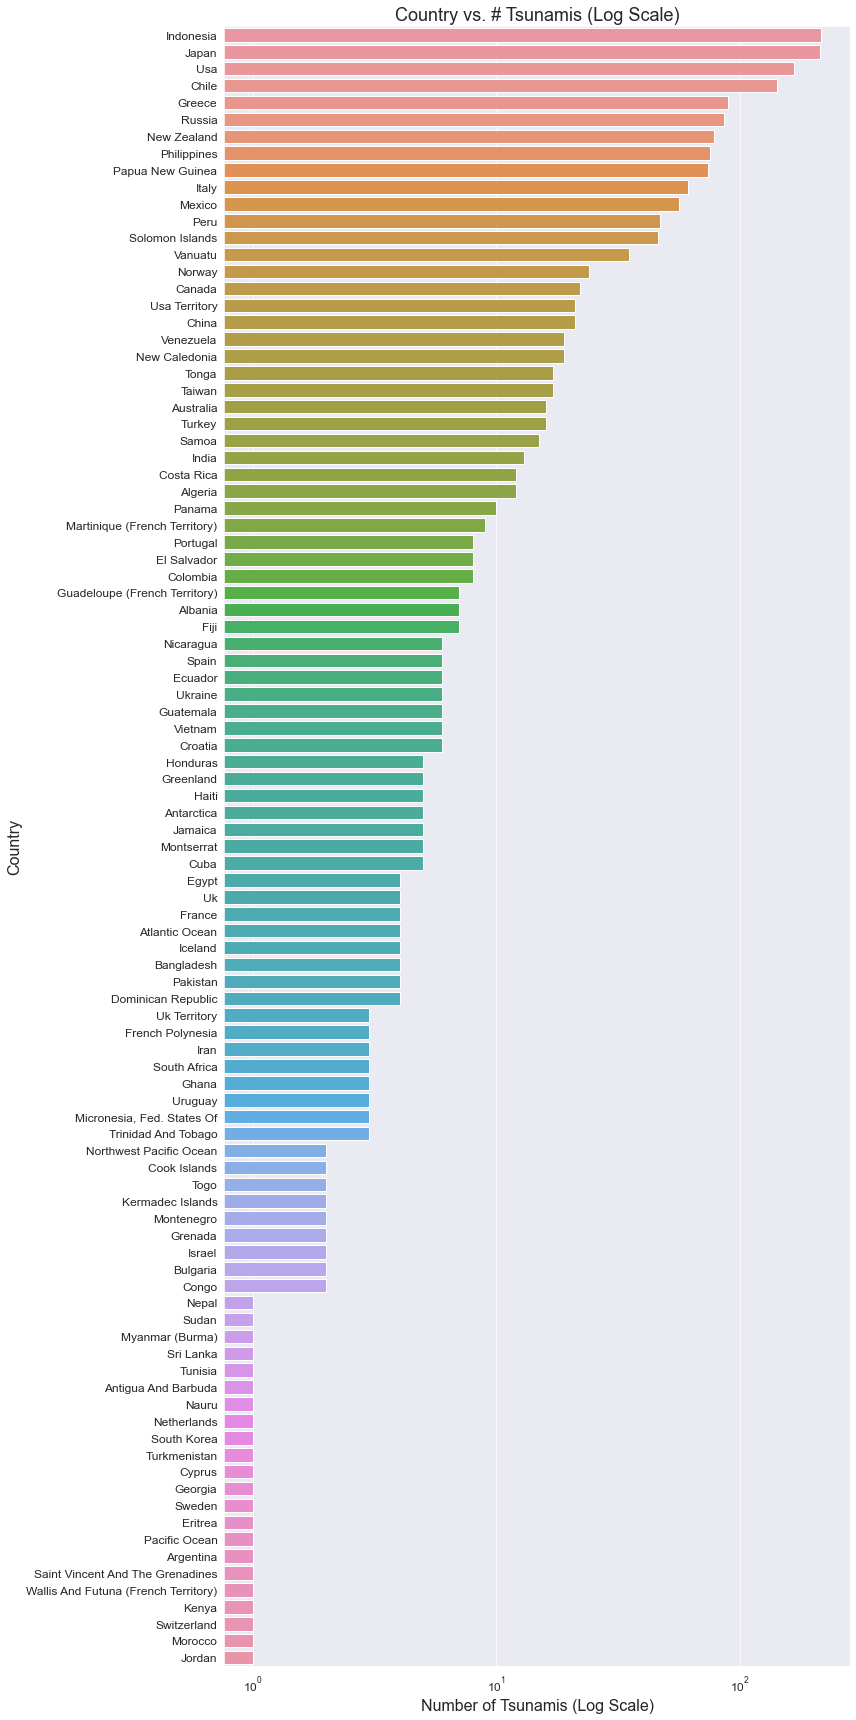

In [23]:
plt.figure(figsize=(12,24))
countries = list(map(lambda x: x.title(), merge_df["Country"].value_counts().keys().tolist()))
ax = sns.countplot(y="Country", data=merge_df, order=merge_df["Country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

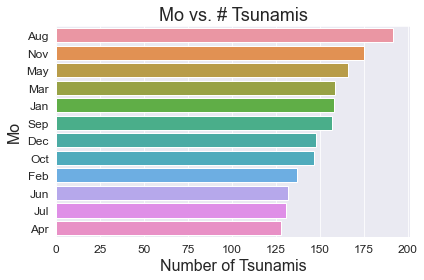

In [24]:
plt.figure(figsize=(6,4))
month_idxs = np.array(list(map(lambda x: int(x), merge_df["Mo"].value_counts().keys().tolist())))-1
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = list(map(month_names.__getitem__, month_idxs))
ax = sns.countplot(y="Mo", data=merge_df, order=merge_df["Mo"].value_counts().index)
ax.axes.set_title("Mo vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Number of Tsunamis",fontsize=16)
ax.set_ylabel("Mo",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(months, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
##################ML#######################

In [26]:
print(merge_df['Tsunami Cause Code'])

0       10.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
1858     0.0
1859     0.0
1860     0.0
1861     0.0
1862     0.0
Name: Tsunami Cause Code, Length: 1863, dtype: float64


In [27]:
del merge_df['LATITUDE'] 
del merge_df['LONGITUDE']
del merge_df['LOCATION_N']
del merge_df['CAUSE_CODE']

In [28]:
merge_df = merge_df.fillna(0)
merge_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Focal Depth (km),...,Country,Area,Region,Location Name,Latitude,Longitude,DATE_STRIN,AREA,COUNTRY,REGION_COD
0,1917.0,12.0,6.0,13.0,4.0,0.0,4.0,10.0,0.0,0.0,...,CANADA,NS,75.0,"HALIFAX, NOVA SCOTIA",44.633,-63.583,0,0,0,0.0
1,1915.0,2.0,11.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,...,USA TERRITORY,AS,81.0,"MANUA ISLANDS, AMERICAN SAMOA",-14.180,-169.660,0,0,0,0.0
2,1934.0,8.0,21.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,USA,CA,88.0,S. CALIFORNIA,33.700,-118.200,0,0,0,0.0
3,1899.0,12.0,25.0,12.0,25.0,0.0,1.0,9.0,6.4,0.0,...,USA,CA,88.0,S. CALIFORNIA,33.800,-118.500,0,0,0,0.0
4,1856.0,9.0,0.0,0.0,0.0,0.0,2.0,9.0,0.0,0.0,...,JAPAN,0,85.0,TOKYO BAY,35.600,139.700,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1872.0,6.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,USA,NY,75.0,LAKE ONTARIO,43.500,-78.000,0,0,0,0.0
1859,1874.0,10.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,AUSTRALIA,0,81.0,TASMANIA,-43.328,145.900,0,0,0,0.0
1860,1906.0,8.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,USA,CA,88.0,S. CALIFORNIA,33.900,-117.000,0,0,0,0.0
1861,1840.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,NEW ZEALAND,0,81.0,EAST CAPE,-37.610,178.350,0,0,0,0.0


In [29]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


merge_df =merge_df.rename(columns = {'Tsunami Cause Code': 'Tsunami_Cause_Code'})
merge_df = merge_df[merge_df.Tsunami_Cause_Code != 0]
#X = merge_df[merge_df.columns['Latitude','Longitude','Tsunami Cause Code']]
X = merge_df[['Latitude','Longitude']]

y = merge_df[['Tsunami_Cause_Code']]



X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.55, random_state=40)
model = sklearn.linear_model.LinearRegression().fit(X_train, Y_train)


#print(model.predict(X_test).max())

lat = float(input("Please enter Lat value: "))
long = float(input("Please enter Long value: "))
while (-90 <=lat <= 90 and -180 <= long <= 180):
    prediction = round(float(model.predict([[lat, long]])[0]),0)
    print('Closet Tusanmi Cause Code : {}'.format(prediction))
    lat = float(input("Please enter Lat value: "))
    long = float(input("Please enter Long value: "))
print('Input is out of range!')


Please enter Lat value: 14
Please enter Long value: 11
Closet Tusanmi Cause Code : 2.0
